In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk -q

In [ ]:
!pip install -U sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00


# Import Data

In [ ]:
file_path = '/content/drive/MyDrive/BDC SEMIFINAL/01 Datasets/06 Sample File/03 Final Datasets/UU_Perpu/Perpu Nomor 1 Tahun 2020.txt'
with open(file_path, 'r') as file:
      file_contents = file.read()
      isi_pasal_index = file_contents.find('Isi Pasal:')
      if isi_pasal_index != -1:
          extracted_text = file_contents[isi_pasal_index + len('Isi Pasal:'):]

In [ ]:
extracted_text

"\n\nPERATURAN PEMERINTAH PENGGANTI UNDANG-UNDANG\nTENTANG KEBIJAKAN KEUANGAN NEGARA DAN\nSTABILITAS SISTEM KEUANGAN UNTUK PENANGANAN\nPANDEMI CORONA VIRUS DISEASE 2019 (COVID-19)\nDAN/ATAU DALAM RANGKA MENGHADAPI ANCAMAN\nYANG MEMBAHAYAKAN PEREKONOMIAN  NASIONAL\nDAN/ATAU STABILITAS SISTEM KEUANGAN.\n\nBABI\nRUANG LINGKUP\nPasal 1\n(1) Untuk memenuhi kebutuhan penyelenggaraan\npemerintahan negara, disusun Anggaran Pendapatan\ndan Belanja Negara (APBN) yang terdiri atas anggaran\npendapatan negara, anggaran belanja negara, dan\npembiayaan anggaran.\n\n(2) Untuk melaksanakan Anggaran Pendapatan dan\nBelanja Negara (APBN) sebagaimana dimaksud pada\nayat (1) telah ditetapkan Undang-Undang Nomor 20\nTahun 2019 tentang Anggaran Pendapatan dan Belanja\nNegara Tahun Anggaran 2020.\n\n(3) Untuk melaksanakan Anggaran Pendapatan dan\nBelanja Negara (APBN) sebagaimana dimaksud pada\nayat (1) dan ayat (2) dalam rangka:\n\na. penanganan pandemi Corona Virus Disease 2019\n(COVID-19); dan/atau\n\nb. 

In [ ]:
import re

def split_sentences(text):
  # Split the text into sentences based on '\n\n' pattern
  sentences = re.split(r'\n\n', text)

  # Clean up the sentences by removing leading/trailing whitespaces
  sentences = [sentence.lower().strip() for sentence in sentences]

  return sentences

In [ ]:
res = split_sentences(extracted_text)
print(res)

['', 'peraturan pemerintah pengganti undang-undang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 (covid-19)\ndan/atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan/atau stabilitas sistem keuangan.', 'babi\nruang lingkup\npasal 1\n(1) untuk memenuhi kebutuhan penyelenggaraan\npemerintahan negara, disusun anggaran pendapatan\ndan belanja negara (apbn) yang terdiri atas anggaran\npendapatan negara, anggaran belanja negara, dan\npembiayaan anggaran.', '(2) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) telah ditetapkan undang-undang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020.', '(3) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) dan ayat (2) dalam rangka:', 'a. penanganan pandemi corona virus disease 2019\n(covid-19); dan/atau', 'b.

# Preprocessing

## Remove Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
def remove_stopwords(input_text):
    # Tokenize the input text into words
    words = word_tokenize(input_text)

    # Get the set of Indonesian stopwords
    stop_words = set(stopwords.words('indonesian'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def is_pasal_sentence(sentence):
    # Define the regex pattern to match 'pasal' followed by a number
    pattern = r'\bpasal\s+\d+\b'
    return re.search(pattern, sentence, re.IGNORECASE) is not None

def remove_numbers_in_parentheses(text):
    # Define the regex pattern to match numbers enclosed in parentheses
    pattern = r'\(\s*\d+\s*\)'

    # Use re.sub() to replace the matches with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

def remove_empty_text(sentences):
  non_empty_sentences = [sentence for sentence in sentences if sentence.strip() != ""]
  non_empty_sentences = [sentence.strip() for sentence in non_empty_sentences]
  return non_empty_sentences

def remove_numbering(text):
    pattern = r'^[a-z1-9]\.\s*'
    sentence = re.sub(pattern, '', str(text), flags=re.IGNORECASE).strip()
    pattern_2 = r'\s+[a-z1-9]\.\s+'
    cleaned_sentence = re.sub(pattern_2, '', sentence, flags=re.IGNORECASE).strip()
    return cleaned_sentence

In [ ]:
stopwords_removed = [remove_stopwords(sentence) for sentence in res]
pasal_only_removed = [sentence for sentence in stopwords_removed if not is_pasal_sentence(sentence)]
number_parentheses_removed = [remove_numbers_in_parentheses(sentence) for sentence in pasal_only_removed]
numbering_removed = [remove_numbering(sentence) for sentence in number_parentheses_removed]
cleaned_text = remove_empty_text(numbering_removed)

cleaned_text

['peraturan pemerintah pengganti undang-undang kebijakan keuangan negara stabilitas sistem keuangan penanganan pandemi corona virus disease 2019 ( covid-19 ) dan/atau rangka menghadapi ancaman membahayakan perekonomian nasional dan/atau stabilitas sistem keuangan .',
 'melaksanakan anggaran pendapatan belanja negara ( apbn ) ayat  ditetapkan undang-undang nomor 20 2019 anggaran pendapatan belanja negara anggaran 2020 .',
 'melaksanakan anggaran pendapatan belanja negara ( apbn ) ayat  ayat  rangka :',
 'penanganan pandemi corona virus disease 2019 ( covid-19 ) ; dan/atau',
 'menghadapi ancaman membahayakan perekonomian nasional dan/atau stabilitas sistem keuangan ,',
 'menetapkan kebijakan keuangan negara kebijakan stabilitas sistem keuangan .',
 'kebijakan keuangan negara ayat  meliputi kebijakan pendapatan negara kebijakan bidang perpajakan , kebijakan belanja negara kebijakan bidang keuangan daerah , kebijakan pembiayaan .',
 'kebijakan stabilitas sistem keuangan ayat  meliputi kebi

## Remove Punctuation

In [ ]:
# Remove Punctuation
import string

def remove_punctuation(input_string):
    # Create a translation table to remove punctuation characters except '/'
    translator = str.maketrans('', '', string.punctuation.replace('/', ''))

    # Use the translation table to remove punctuation from the input string
    cleaned_string = input_string.translate(translator)

    # Replace '/' with space ' '
    cleaned_string = cleaned_string.replace('/', ' ')

    return cleaned_string

In [ ]:
cleaned_text2 = remove_punctuation(cleaned_text)
cleaned_text2

['peraturan pemerintah pengganti undangundang kebijakan keuangan negara stabilitas sistem keuangan penanganan pandemi corona virus disease 2019  covid19  dan atau rangka menghadapi ancaman membahayakan perekonomian nasional dan atau stabilitas sistem keuangan',
 'melaksanakan anggaran pendapatan belanja negara  apbn  ayat  ditetapkan undangundang nomor 20 2019 anggaran pendapatan belanja negara anggaran 2020',
 'melaksanakan anggaran pendapatan belanja negara  apbn  ayat  ayat  rangka',
 'penanganan pandemi corona virus disease 2019  covid19   dan atau',
 'menghadapi ancaman membahayakan perekonomian nasional dan atau stabilitas sistem keuangan',
 'menetapkan kebijakan keuangan negara kebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara ayat  meliputi kebijakan pendapatan negara kebijakan bidang perpajakan  kebijakan belanja negara kebijakan bidang keuangan daerah  kebijakan pembiayaan',
 'kebijakan stabilitas sistem keuangan ayat  meliputi kebijakan penanganan permasalah

In [ ]:
def remove_danatau(text):
    # Remove 'dan' and 'atau' from the text
    cleaned_text = text.replace('dan', '').replace('atau', '')

    return cleaned_text

cleaned_text = [remove_danatau(sentence) for sentence in cleaned_text2]
cleaned_text = [sentence for sentence in cleaned_text if 'bab' not in sentence]
# remove text that only include 1 word
cleaned_text = [sentence for sentence in cleaned_text if len(sentence.split()) != 1]

In [ ]:
cleaned_text

['peraturan pemerintah pengganti ungung kebijakan keuangan negara stabilitas sistem keuangan penanganan pandemi corona virus disease 2019  covid19    rangka menghadapi ancaman membahayakan perekonomian nasional   stabilitas sistem keuangan',
 'melaksanakan anggaran pendapatan belanja negara  apbn  ayat  ditetapkan ungung nomor 20 2019 anggaran pendapatan belanja negara anggaran 2020',
 'melaksanakan anggaran pendapatan belanja negara  apbn  ayat  ayat  rangka',
 'penanganan pandemi corona virus disease 2019  covid19    ',
 'menghadapi ancaman membahayakan perekonomian nasional   stabilitas sistem keuangan',
 'menetapkan kebijakan keuangan negara kebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara ayat  meliputi kebijakan pendapatan negara kebijakan big perpajakan  kebijakan belanja negara kebijakan big keuangan daerah  kebijakan pembiayaan',
 'kebijakan stabilitas sistem keuangan ayat  meliputi kebijakan penanganan permasalahan lembaga keuangan membahayakan perekonomian 

## Pos-Tagging

In [ ]:
# Install build dependencies
!apt-get install build-essential -q

!pip install python-crfsuite

Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [ ]:
from nltk.tag import CRFTagger
import pycrfsuite

In [ ]:
ct = CRFTagger()
model = '/content/drive/MyDrive/BDC SEMIFINAL/02 Codes/all_indo_man_tag_corpus_model.crf.tagger'
ct.set_model_file(model)
hasil = ct.tag_sents([['Saya','bekerja','di','Bandung']])
print(hasil)

NameError: ignored

## Stemming

In [ ]:
!pip install Sastrawi -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_text(input_text):
    # Buat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Lakukan stemming pada teks input
    stemmed_text = stemmer.stem(input_text)

    return stemmed_text

In [ ]:
stemmed_text = [stemming_text(sentence) for sentence in cleaned_text]
stemmed_text

['atur perintah ganti ungung bijak uang negara stabilitas sistem uang tangan pandemi corona virus disease 2019 covid19 rangka hadap ancam bahaya ekonomi nasional stabilitas sistem uang',
 'laksana anggar dapat belanja negara apbn ayat tetap ungung nomor 20 2019 anggar dapat belanja negara anggar 2020',
 'laksana anggar dapat belanja negara apbn ayat ayat rangka',
 'tangan pandemi corona virus disease 2019 covid19',
 'hadap ancam bahaya ekonomi nasional stabilitas sistem uang',
 'tetap bijak uang negara bijak stabilitas sistem uang',
 'bijak uang negara ayat liput bijak dapat negara bijak big paja bijak belanja negara bijak big uang daerah bijak biaya',
 'bijak stabilitas sistem uang ayat liput bijak tangan masalah lembaga uang bahaya ekonomi nasional stabilitas sistem uang',
 'satu anggar biaya',
 'tetap batas defisit anggar tentu',
 'lampau 3 persen produk domestik bruto pdb tangan corona virus disease 2019 covid19 hadap ancam bahaya ekonomi nasional stabilitas sistem uang anggar 2022

## bag-of-ngrams models

In [ ]:
from nltk import word_tokenize
from nltk.util import ngrams

# Function to generate bigrams for a given sentence
def generate_bigrams(sentence):
    tokens = word_tokenize(sentence)
    return [' '.join(bigram) for bigram in list(ngrams(tokens, 2))]

# Generate bigrams for each sentence
all_bigrams = [generate_bigrams(sentence) for sentence in stemmed_text]

# Flatten the list of bigrams to get all bigrams from the entire text
all_bigrams_flat = [bigram for bigrams in all_bigrams for bigram in bigrams]

# Convert the list of bigrams into a space-separated string representation
text_data_bigrams = [' '.join(bigrams) for bigrams in all_bigrams]

print(text_data_bigrams)

['atur perintah perintah ganti ganti ungung ungung bijak bijak uang uang negara negara stabilitas stabilitas sistem sistem uang uang tangan tangan pandemi pandemi corona corona virus virus disease disease 2019 2019 covid19 covid19 rangka rangka hadap hadap ancam ancam bahaya bahaya ekonomi ekonomi nasional nasional stabilitas stabilitas sistem sistem uang', 'laksana anggar anggar dapat dapat belanja belanja negara negara apbn apbn ayat ayat tetap tetap ungung ungung nomor nomor 20 20 2019 2019 anggar anggar dapat dapat belanja belanja negara negara anggar anggar 2020', 'laksana anggar anggar dapat dapat belanja belanja negara negara apbn apbn ayat ayat ayat ayat rangka', 'tangan pandemi pandemi corona corona virus virus disease disease 2019 2019 covid19', 'hadap ancam ancam bahaya bahaya ekonomi ekonomi nasional nasional stabilitas stabilitas sistem sistem uang', 'tetap bijak bijak uang uang negara negara bijak bijak stabilitas stabilitas sistem sistem uang', 'bijak uang uang negara ne

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TfidfVectorizer and apply it to the bigrams
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2))
tfidf_matrix = vectorizer.fit_transform(stemmed_text)

# Convert the tf-idf matrix to a dense matrix
tfidf_matrix_dense = tfidf_matrix.toarray()

# Get the feature names (bigrams) in the order they appear in the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

# Print the tf-idf matrix and corresponding feature names
print("TF-IDF Matrix:")
print(tfidf_matrix_dense)
print("Feature Names (Bigrams):")
print(feature_names)

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names (Bigrams):
['16' '16 2009' '17b' ... 'wnilai manfaat' 'wujud' 'wujud jasa']


In [ ]:
import pandas as pd
pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

,16,16 2009,17b,17b ayat,1983,1983 tentu,20,20 2019,20 puluh,2009,...,wenang fasilitas,wenang laksana,wenang lembaga,wenang menteri,wenang otoritas,wenang putus,wnilai,wnilai manfaat,wujud,wujud jasa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.162428,0.176088,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Combine All Document

In [ ]:
import os
import pandas as pd

base_dir = '/content/drive/MyDrive/BDC SEMIFINAL/01 Datasets/06 Sample File/03 Final Datasets'

data = []

def extract_text(file_path):
    with open(file_path, 'r') as file:
        file_contents = file.read()
        isi_pasal_index = file_contents.find('Isi Pasal:')
        if isi_pasal_index != -1:
            extracted_text = file_contents[isi_pasal_index + len('Isi Pasal:'):]
            return extracted_text.strip()
    return None

# Traverse all subfolders and process .txt files
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(root, file)
            extracted_text = extract_text(file_path)
            if extracted_text:
                data.append((file, extracted_text))

df = pd.DataFrame(data, columns=['FileName', 'ExtractedText'])

In [ ]:
df

,FileName,ExtractedText
0,Perpu Nomor 1 Tahun 2020.txt,PERATURAN PEMERINTAH PENGGANTI UNDANG-UNDANG\n...
1,Perpres Nomor 31 Tahun 2021.txt,:\n\nPERATURAN PRESIDEN TENTANG PENATAAN TUGAS...
2,Peraturan_Presiden_No.44_Tahun_2008.txt,:\n\nMenetapkan : PERATURAN PRESIDEN TENTANG S...
3,Salinan Perpres Nomor 71 Tahun 2019 .txt,:\n\nPERATURAN PRESIDEN TENTANG KEMENTERIAN\nK...
4,PERMEN_PERIN_64MINDPER72016_2016.txt,:\n\nPERATURAN MENTERI PERINDUSTRIAN TENTANG B...
5,pmmarves002_2021.txt,:\nMenetapkan : PERATURAN MENTERI KOORDINATOR ...
6,Peraturan_Pemerintah_No._45_Tahun_1995.txt,:\nMenetapkan:\nPERATURAN PEMERINTAH TENTANG P...
7,Peraturan_Pemerintah_No._49_Tahun_2011.txt,...\n\nMEMUTUSKAN:\nPERATURAN PEMERINTAH TENTA...
8,Peraturan_Pemerintah_No.1_Tahun_2008.txt,Menetapkan:\n\nPERATURAN PEMERINTAH TENTANG IN...
9,2021pp049.txt,:\n\nMenetapkan : PERATURAN PEMERINTAH TENTANG...


## Modify the Function

In [ ]:
import pandas as pd
import nltk
nltk.data.path.append("/root/nltk_data/tokenizers")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt', download_dir="/root/nltk_data", quiet=True, raise_on_error=True)
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
!pip install Sastrawi -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def split_sentences(text):
  # Split the text into sentences based on '\n\n' pattern
  sentences = re.split(r'\n\n', text)

  # Clean up the sentences by removing leading/trailing whitespaces
  sentences = [sentence.lower().strip() for sentence in sentences]

  return sentences

def remove_punctuation(sentences):
    translator = str.maketrans('', '', string.punctuation.replace('/', ''))
    cleaned_sentences = []
    for sentence in sentences:
        cleaned_sentence = sentence.translate(translator)
        cleaned_sentence = cleaned_sentence.replace('/', ' ')
        cleaned_sentences.append(cleaned_sentence)
    return cleaned_sentences

def remove_stopwords(sentences_list):
    # Download Indonesian stopwords list from NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Tokenize each sentence and remove stopwords
    cleaned_sentences = []
    for sentence in sentences_list:
        words = word_tokenize(sentence)
        filtered_sentence = [word for word in words if word.lower() not in stop_words]
        cleaned_sentences.append(' '.join(filtered_sentence))

    return cleaned_sentences

def remove_pasal_sentences(text_list):
    # Define the regular expression pattern to match 'pasal' followed by a space and digits
    pattern = r'pasal\s\d+'
    # Filter out sentences that match the regular expression
    filtered_list = [sentence for sentence in text_list if not re.search(pattern, sentence)]

    return filtered_list

def remove_empty_text(sentences_list):
    non_empty_sentences = [[sentence for sentence in sentences if sentence.strip() != ""] for sentences in sentences_list]
    non_empty_sentences = [sentences for sentences in non_empty_sentences if sentences]  # Remove empty lists
    return non_empty_sentences

def remove_numbering(sentences_list):
    # Define the regular expression pattern to match numbering patterns
    pattern = r'^\s*(?:[a-zA-Z]|\d+|\(\d+\))\.\s+'

    # Remove the numbering pattern from each sentence in the list
    filtered_list = [re.sub(pattern, '', sentence) for sentence in sentences_list]

    return filtered_list

def remove_numbering_in_parentheses(sentences_list):
    # Define the regular expression pattern to match the numbering in parentheses at the start of the sentence
    pattern = r'^\s*\(\d+\)\s+'

    # Remove the numbering pattern from each sentence in the list
    filtered_list = [re.sub(pattern, '', sentence) for sentence in sentences_list]

    return filtered_list

def remove_danatau(sentences):
    # Remove 'danatau' from the text
    cleaned_sentences = [sentence.replace('danatau', '') for sentence in sentences]
    return cleaned_sentences

def replace_newlines_with_spaces(sentences_list):
    # Replace '\n' with a space in each sentence
    cleaned_list = [sentence.replace('\n', ' ') for sentence in sentences_list]

    return cleaned_list


def filter_sentences(sentences_list):
    # Remove sentences that only have 1 word or include 'bab'
    filtered_sentences = [sentence for sentence in sentences_list if len(sentence.split()) > 1 and 'bab' not in sentence]
    return filtered_sentences

def stem_text(sentences_list):
    # Create a StemmerFactory and get the default Indonesian stemmer
    stemmer = StemmerFactory().create_stemmer()

    # Stem each sentence in the list
    stemmed_sentences = [stemmer.stem(sentence) for sentence in sentences_list]

    return stemmed_sentences

## Preprocess

In [ ]:
df['cleaned_text'] = df['ExtractedText'].apply(split_sentences)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undang-undang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 (covid-19)\ndan/atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan/atau stabilitas sistem keuangan.',
 'babi\nruang lingkup\npasal 1\n(1) untuk memenuhi kebutuhan penyelenggaraan\npemerintahan negara, disusun anggaran pendapatan\ndan belanja negara (apbn) yang terdiri atas anggaran\npendapatan negara, anggaran belanja negara, dan\npembiayaan anggaran.',
 '(2) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) telah ditetapkan undang-undang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020.',
 '(3) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) dan ayat (2) dalam rangka:',
 'a. penanganan pandemi corona virus disease 2019\n(covid-19); dan/atau',
 'b

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_pasal_sentences)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undang-undang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 (covid-19)\ndan/atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan/atau stabilitas sistem keuangan.',
 '(2) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) telah ditetapkan undang-undang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020.',
 '(3) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) dan ayat (2) dalam rangka:',
 'a. penanganan pandemi corona virus disease 2019\n(covid-19); dan/atau',
 'b. menghadapi ancaman yang membahayakan\nperekonomian nasional dan/atau stabilitas sistem\nkeuangan,',
 'perlu menetapkan kebijakan keuangan negara dan\nkebijakan stabilitas sistem keuangan.',
 '(4) kebijakan keuangan negara sebagaimana dimaksud\npada aya

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_numbering)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undang-undang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 (covid-19)\ndan/atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan/atau stabilitas sistem keuangan.',
 '(2) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) telah ditetapkan undang-undang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020.',
 '(3) untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) dan ayat (2) dalam rangka:',
 'penanganan pandemi corona virus disease 2019\n(covid-19); dan/atau',
 'menghadapi ancaman yang membahayakan\nperekonomian nasional dan/atau stabilitas sistem\nkeuangan,',
 'perlu menetapkan kebijakan keuangan negara dan\nkebijakan stabilitas sistem keuangan.',
 '(4) kebijakan keuangan negara sebagaimana dimaksud\npada ayat (3) 

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_numbering_in_parentheses)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undang-undang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 (covid-19)\ndan/atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan/atau stabilitas sistem keuangan.',
 'untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) telah ditetapkan undang-undang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020.',
 'untuk melaksanakan anggaran pendapatan dan\nbelanja negara (apbn) sebagaimana dimaksud pada\nayat (1) dan ayat (2) dalam rangka:',
 'penanganan pandemi corona virus disease 2019\n(covid-19); dan/atau',
 'menghadapi ancaman yang membahayakan\nperekonomian nasional dan/atau stabilitas sistem\nkeuangan,',
 'perlu menetapkan kebijakan keuangan negara dan\nkebijakan stabilitas sistem keuangan.',
 'kebijakan keuangan negara sebagaimana dimaksud\npada ayat (3) meliputi keb

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuation)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undangundang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 covid19\ndan atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan atau stabilitas sistem keuangan',
 'untuk melaksanakan anggaran pendapatan dan\nbelanja negara apbn sebagaimana dimaksud pada\nayat 1 telah ditetapkan undangundang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020',
 'untuk melaksanakan anggaran pendapatan dan\nbelanja negara apbn sebagaimana dimaksud pada\nayat 1 dan ayat 2 dalam rangka',
 'penanganan pandemi corona virus disease 2019\ncovid19 dan atau',
 'menghadapi ancaman yang membahayakan\nperekonomian nasional dan atau stabilitas sistem\nkeuangan',
 'perlu menetapkan kebijakan keuangan negara dan\nkebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara sebagaimana dimaksud\npada ayat 3 meliputi kebijakan pendapatan negara\n

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_danatau)
df['cleaned_text'][0]


['peraturan pemerintah pengganti undangundang\ntentang kebijakan keuangan negara dan\nstabilitas sistem keuangan untuk penanganan\npandemi corona virus disease 2019 covid19\ndan atau dalam rangka menghadapi ancaman\nyang membahayakan perekonomian  nasional\ndan atau stabilitas sistem keuangan',
 'untuk melaksanakan anggaran pendapatan dan\nbelanja negara apbn sebagaimana dimaksud pada\nayat 1 telah ditetapkan undangundang nomor 20\ntahun 2019 tentang anggaran pendapatan dan belanja\nnegara tahun anggaran 2020',
 'untuk melaksanakan anggaran pendapatan dan\nbelanja negara apbn sebagaimana dimaksud pada\nayat 1 dan ayat 2 dalam rangka',
 'penanganan pandemi corona virus disease 2019\ncovid19 dan atau',
 'menghadapi ancaman yang membahayakan\nperekonomian nasional dan atau stabilitas sistem\nkeuangan',
 'perlu menetapkan kebijakan keuangan negara dan\nkebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara sebagaimana dimaksud\npada ayat 3 meliputi kebijakan pendapatan negara\n

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(replace_newlines_with_spaces)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undangundang tentang kebijakan keuangan negara dan stabilitas sistem keuangan untuk penanganan pandemi corona virus disease 2019 covid19 dan atau dalam rangka menghadapi ancaman yang membahayakan perekonomian  nasional dan atau stabilitas sistem keuangan',
 'untuk melaksanakan anggaran pendapatan dan belanja negara apbn sebagaimana dimaksud pada ayat 1 telah ditetapkan undangundang nomor 20 tahun 2019 tentang anggaran pendapatan dan belanja negara tahun anggaran 2020',
 'untuk melaksanakan anggaran pendapatan dan belanja negara apbn sebagaimana dimaksud pada ayat 1 dan ayat 2 dalam rangka',
 'penanganan pandemi corona virus disease 2019 covid19 dan atau',
 'menghadapi ancaman yang membahayakan perekonomian nasional dan atau stabilitas sistem keuangan',
 'perlu menetapkan kebijakan keuangan negara dan kebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara sebagaimana dimaksud pada ayat 3 meliputi kebijakan pendapatan negara termasuk kebijakan

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undangundang kebijakan keuangan negara stabilitas sistem keuangan penanganan pandemi corona virus disease 2019 covid19 rangka menghadapi ancaman membahayakan perekonomian nasional stabilitas sistem keuangan',
 'melaksanakan anggaran pendapatan belanja negara apbn ayat 1 ditetapkan undangundang nomor 20 2019 anggaran pendapatan belanja negara anggaran 2020',
 'melaksanakan anggaran pendapatan belanja negara apbn ayat 1 ayat 2 rangka',
 'penanganan pandemi corona virus disease 2019 covid19',
 'menghadapi ancaman membahayakan perekonomian nasional stabilitas sistem keuangan',
 'menetapkan kebijakan keuangan negara kebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara ayat 3 meliputi kebijakan pendapatan negara kebijakan bidang perpajakan kebijakan belanja negara kebijakan bidang keuangan daerah kebijakan pembiayaan',
 'kebijakan stabilitas sistem keuangan ayat 3 meliputi kebijakan penanganan permasalahan lembaga keuangan membahayakan perekonom

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(filter_sentences)
df['cleaned_text'][0]

['peraturan pemerintah pengganti undangundang kebijakan keuangan negara stabilitas sistem keuangan penanganan pandemi corona virus disease 2019 covid19 rangka menghadapi ancaman membahayakan perekonomian nasional stabilitas sistem keuangan',
 'melaksanakan anggaran pendapatan belanja negara apbn ayat 1 ditetapkan undangundang nomor 20 2019 anggaran pendapatan belanja negara anggaran 2020',
 'melaksanakan anggaran pendapatan belanja negara apbn ayat 1 ayat 2 rangka',
 'penanganan pandemi corona virus disease 2019 covid19',
 'menghadapi ancaman membahayakan perekonomian nasional stabilitas sistem keuangan',
 'menetapkan kebijakan keuangan negara kebijakan stabilitas sistem keuangan',
 'kebijakan keuangan negara ayat 3 meliputi kebijakan pendapatan negara kebijakan bidang perpajakan kebijakan belanja negara kebijakan bidang keuangan daerah kebijakan pembiayaan',
 'kebijakan stabilitas sistem keuangan ayat 3 meliputi kebijakan penanganan permasalahan lembaga keuangan membahayakan perekonom

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(stem_text)
df['cleaned_text'][0]

['atur perintah ganti undangundang bijak uang negara stabilitas sistem uang tangan pandemi corona virus disease 2019 covid19 rangka hadap ancam bahaya ekonomi nasional stabilitas sistem uang',
 'laksana anggar dapat belanja negara apbn ayat 1 tetap undangundang nomor 20 2019 anggar dapat belanja negara anggar 2020',
 'laksana anggar dapat belanja negara apbn ayat 1 ayat 2 rangka',
 'tangan pandemi corona virus disease 2019 covid19',
 'hadap ancam bahaya ekonomi nasional stabilitas sistem uang',
 'tetap bijak uang negara bijak stabilitas sistem uang',
 'bijak uang negara ayat 3 liput bijak dapat negara bijak bidang paja bijak belanja negara bijak bidang uang daerah bijak biaya',
 'bijak stabilitas sistem uang ayat 3 liput bijak tangan masalah lembaga uang bahaya ekonomi nasional stabilitas sistem uang',
 'satu anggar biaya',
 'tetap batas defisit anggar tentu',
 'lampau 3 persen produk domestik bruto pdb tangan corona virus disease 2019 covid19 hadap ancam bahaya ekonomi nasional stabil

In [ ]:
def combine_sentences(sentences_list):
    # Combine the list of sentences into one text
    combined_text = ' '.join(sentences_list)

    return combined_text

In [ ]:
df['final_text'] = df['cleaned_text'].apply(combine_sentences)
df['final_text'][0]

'atur perintah ganti undangundang bijak uang negara stabilitas sistem uang tangan pandemi corona virus disease 2019 covid19 rangka hadap ancam bahaya ekonomi nasional stabilitas sistem uang laksana anggar dapat belanja negara apbn ayat 1 tetap undangundang nomor 20 2019 anggar dapat belanja negara anggar 2020 laksana anggar dapat belanja negara apbn ayat 1 ayat 2 rangka tangan pandemi corona virus disease 2019 covid19 hadap ancam bahaya ekonomi nasional stabilitas sistem uang tetap bijak uang negara bijak stabilitas sistem uang bijak uang negara ayat 3 liput bijak dapat negara bijak bidang paja bijak belanja negara bijak bidang uang daerah bijak biaya bijak stabilitas sistem uang ayat 3 liput bijak tangan masalah lembaga uang bahaya ekonomi nasional stabilitas sistem uang satu anggar biaya tetap batas defisit anggar tentu lampau 3 persen produk domestik bruto pdb tangan corona virus disease 2019 covid19 hadap ancam bahaya ekonomi nasional stabilitas sistem uang anggar 2022 anggar 2023 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TfidfVectorizer and apply it to the bigrams
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), max_features = 500)
tfidf_matrix = vectorizer.fit_transform(df['final_text'])

# Convert the tf-idf matrix to a dense matrix
tfidf_matrix_dense = tfidf_matrix.toarray()

# Get the feature names (bigrams) in the order they appear in the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Print the tf-idf matrix and corresponding feature names
print("TF-IDF Matrix:")
print(tfidf_matrix_dense.shape)

TF-IDF Matrix:
(10, 500)


In [ ]:
print("Feature Names (Bigrams):")
print(feature_names)

Feature Names (Bigrams):
['2019' '2019 covid19' '50000000000' 'administrasi' 'ahli' 'ahli bidang'
 'aju' 'alam' 'alam jasa' 'aman' 'ambil' 'anggar' 'anggar dapat' 'anggota'
 'anggota bursa' 'anggota direksi' 'anggota djsn' 'angkat' 'antara'
 'antara dagang' 'asal' 'aset' 'asing' 'atur' 'atur atur' 'atur menteri'
 'atur perintah' 'atur perundangundangan' 'atur presiden' 'atur undang'
 'awas' 'ayat' 'ayat atur' 'ayat ayat' 'ayat huruf' 'badan' 'badan hukum'
 'badan investasi' 'badan koordinasi' 'badan usaha' 'bahaya'
 'bahaya ekonomi' 'bangun' 'bank' 'bank indonesia' 'bank sistemik'
 'bapepam' 'barang' 'batas' 'bayar' 'beban' 'belanja' 'belanja negara'
 'beli' 'beli surat' 'bentuk' 'beri' 'beri pinjam' 'bersih'
 'bersih sesuai' 'besar' 'biaya' 'bidang' 'bidang koordinasi'
 'bidang maritim' 'bidang sumber' 'bidang uang' 'bijak' 'bijak kendali'
 'bijak menteri' 'bina' 'biro' 'biro hukum' 'bisnis' 'blu' 'blu perintah'
 'blud' 'bruto' 'budaya' 'budaya maritim' 'bukti' 'bursa' 'bursa efek'
 '

## Document-Term Matrix

In [ ]:
DTM_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())
DTM_df.index = df['FileName']
DTM_df

,2019,2019 covid19,50000000000,administrasi,ahli,ahli bidang,aju,alam,alam jasa,aman,...,usaha milik,usul,utang,virus,virus disease,wajib,wajib pajak,wakil,wenang,wilayah
FileName,,,,,,,,,,,,,,,,,,,,,
Perpu Nomor 1 Tahun 2020.txt,0.061187,0.074044,0.00000,0.005440,0.000000,0.000000,0.005440,0.000000,0.00000,0.000000,...,0.014656,0.000000,0.055069,0.074044,0.074044,0.039749,0.018356,0.008833,0.043969,0.000000
Perpres Nomor 31 Tahun 2021.txt,0.021040,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.018707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Peraturan_Presiden_No.44_Tahun_2008.txt,0.000000,0.000000,0.00000,0.008743,0.049168,0.019667,0.008743,0.019667,0.00000,0.008743,...,0.007851,0.043714,0.000000,0.000000,0.000000,0.021294,0.000000,0.007098,0.007851,0.000000
Salinan Perpres Nomor 71 Tahun 2019 .txt,0.009088,0.000000,0.00000,0.012120,0.063619,0.036354,0.000000,0.036354,0.04888,0.004040,...,0.000000,0.004040,0.000000,0.000000,0.000000,0.000000,0.000000,0.003280,0.000000,0.015582
PERMEN_PERIN_64MINDPER72016_2016.txt,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pmmarves002_2021.txt,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.015814,0.000000,0.00000,0.023721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.019259,0.000000,0.006420,0.000000,0.000000
Peraturan_Pemerintah_No._45_Tahun_1995.txt,0.000000,0.000000,0.03788,0.018785,0.028172,0.010565,0.037571,0.003522,0.00000,0.006262,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.058463,0.017608,0.025419,0.005623,0.000000
Peraturan_Pemerintah_No._49_Tahun_2011.txt,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.036950,0.000000,0.023139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Peraturan_Pemerintah_No.1_Tahun_2008.txt,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.011439,0.031844,0.050144,0.000000,0.000000,0.036194,0.000000,0.005171,0.068634,0.000000


## Not Used | Apply PCA to reduce dimensionality (The sample we have is too few so we can only reduce into 10 components)

In [ ]:
from sklearn.decomposition import PCA
dtm = tfidf_matrix_dense

# Apply PCA to the DTM
num_components = 10  # Set the desired number of components (you can adjust this value)
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(dtm)

# Print the explained variance ratio (optional)
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[1.96133615e-01 1.62150624e-01 1.28127989e-01 1.22772569e-01
 1.15886214e-01 1.08803090e-01 8.21165236e-02 7.24003985e-02
 1.16089771e-02 2.60993958e-32]


In [ ]:
print("\nPCA Result:")
print(pca_result)


PCA Result:
[[ 5.66177735e-02 -3.79463375e-01  7.80103243e-03  5.31223773e-01
  -2.06152471e-01 -1.14871141e-01 -4.87985712e-01 -1.23318901e-01
  -7.89153797e-03  1.40495530e-16]
 [-1.81739767e-01  3.92478058e-01 -2.52544272e-01  6.26350172e-02
  -3.98433427e-01  5.84528583e-01  8.02243991e-02 -2.03052438e-01
   2.60776753e-03  1.40495530e-16]
 [-2.44255577e-01 -1.39269164e-01 -4.03348289e-01  2.26782323e-01
   7.10755553e-01  1.62904168e-01  8.25098025e-02  2.43928688e-02
   2.56649633e-04  1.40495530e-16]
 [-4.14088987e-01  5.10966534e-01  5.27004483e-03  8.62388918e-02
  -1.12139073e-01 -2.39223618e-01 -9.90572056e-02  5.03814044e-01
  -4.35149526e-03  1.40495530e-16]
 [-1.80920143e-01 -2.45970936e-01  5.28283981e-01 -4.59427781e-01
   1.61174732e-01  3.70701264e-01 -2.52770335e-01  8.67969643e-02
   2.10440281e-04  1.40495530e-16]
 [-3.86493869e-01  3.08391423e-01  3.17378900e-01 -4.68578638e-02
   1.22400829e-01 -4.05630641e-01  1.21563308e-01 -4.52883051e-01
  -1.30574140e-03  1

## Calculate the similarity

In [ ]:
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(DTM_df)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=DTM_df.index, columns=DTM_df.index)

In [ ]:
cosine_similarity_df

FileName,Perpu Nomor 1 Tahun 2020.txt,Perpres Nomor 31 Tahun 2021.txt,Peraturan_Presiden_No.44_Tahun_2008.txt,Salinan Perpres Nomor 71 Tahun 2019 .txt,PERMEN_PERIN_64MINDPER72016_2016.txt,pmmarves002_2021.txt,Peraturan_Pemerintah_No._45_Tahun_1995.txt,Peraturan_Pemerintah_No._49_Tahun_2011.txt,Peraturan_Pemerintah_No.1_Tahun_2008.txt,2021pp049.txt
FileName,,,,,,,,,,
Perpu Nomor 1 Tahun 2020.txt,1.000000,0.102237,0.162412,0.109338,0.101606,0.113898,0.135565,0.207687,0.240051,0.352943
Perpres Nomor 31 Tahun 2021.txt,0.102237,1.000000,0.101921,0.286283,0.078176,0.149190,0.044058,0.177338,0.181067,0.083896
Peraturan_Presiden_No.44_Tahun_2008.txt,0.162412,0.101921,1.000000,0.129967,0.092127,0.143164,0.098279,0.104002,0.115404,0.109765
Salinan Perpres Nomor 71 Tahun 2019 .txt,0.109338,0.286283,0.129967,1.000000,0.078561,0.398211,0.036360,0.112423,0.140112,0.059818
PERMEN_PERIN_64MINDPER72016_2016.txt,0.101606,0.078176,0.092127,0.078561,1.000000,0.200075,0.101232,0.126263,0.132388,0.216993
pmmarves002_2021.txt,0.113898,0.149190,0.143164,0.398211,0.200075,1.000000,0.052114,0.130153,0.149698,0.147949
Peraturan_Pemerintah_No._45_Tahun_1995.txt,0.135565,0.044058,0.098279,0.036360,0.101232,0.052114,1.000000,0.091475,0.089939,0.118713
Peraturan_Pemerintah_No._49_Tahun_2011.txt,0.207687,0.177338,0.104002,0.112423,0.126263,0.130153,0.091475,1.000000,0.911242,0.236440
Peraturan_Pemerintah_No.1_Tahun_2008.txt,0.240051,0.181067,0.115404,0.140112,0.132388,0.149698,0.089939,0.911242,1.000000,0.234424


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

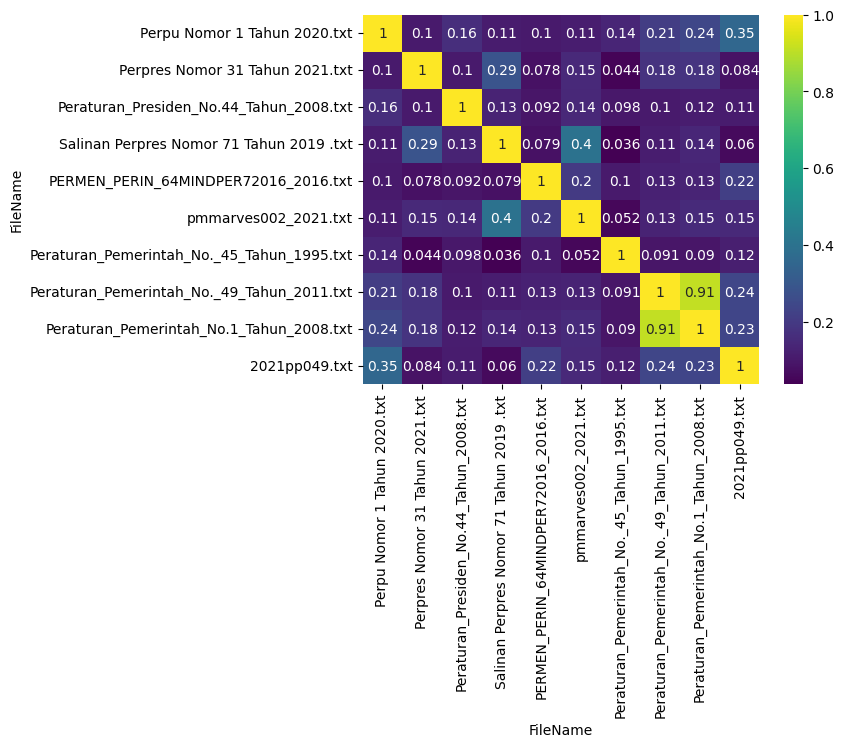

In [ ]:
sns.heatmap(cosine_similarity_df, annot=True, cmap='viridis')
# Show the heatmap
plt.show()